<a href="https://colab.research.google.com/github/Lakshmikalyani348/FMML--Lab/blob/main/day6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
tf.random.set_seed(7)

In [6]:
top_words = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words) # Changed 'imbd' to 'imdb'

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:


# Define max_review_length before using it
max_review_length = 500

# Use x_train (lowercase) to pad the sequences
X_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

In [13]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(SimpleRNN(100))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 103s 257ms/step - accuracy: 0.5673 - loss: 0.6700 - val_accuracy: 0.8017 - val_loss: 0.4372
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 141s 255ms/step - accuracy: 0.7437 - loss: 0.5250 - val_accuracy: 0.7322 - val_loss: 0.5288
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 255ms/step - accuracy: 0.7914 - loss: 0.4536 - val_accuracy: 0.7956 - val_loss: 0.4510


In [16]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 79.56%


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize

import nltk
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [18]:
import warnings
warnings .filterwarnings("ignore")

In [33]:
df=pd.read_csv('spam.csv',encoding_errors= 'replace')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [34]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [35]:
df.columns = ['Label', 'Message']

In [36]:
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
df.shape

(5572, 2)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [39]:
df.describe(include='object')

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [40]:
df.duplicated().sum()

403

In [41]:
df.shape

(5572, 2)

In [42]:
df.duplicated().sum()

403

In [43]:
pip install wordcloud

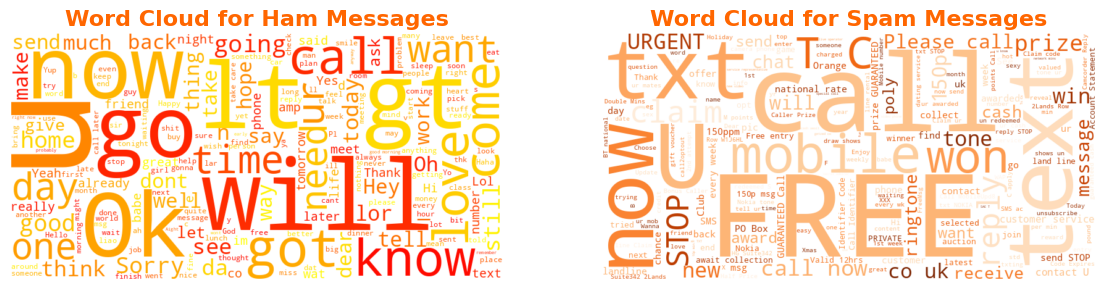

In [44]:
from wordcloud import WordCloud

# Word Cloud for Ham
ham_words = ' '.join(df[df['Label'] == 'ham']['Message'])
ham_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='autumn').generate(ham_words)

# Word Cloud for Spam
spam_words = ' '.join(df[df['Label'] == 'spam']['Message'])
spam_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Oranges').generate(spam_words)

# Display word clouds
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages', fontsize=16, color='#FF6600', fontweight='bold')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages', fontsize=16, color='#FF6600', fontweight='bold')
plt.axis('off')

plt.show()

In [45]:
# Adding Word Count Feature
df['Word_Count'] = df['Message'].apply(lambda x: len(str(x).split()))

# Adding Character Count Feature
df['Char_Count'] = df['Message'].apply(lambda x: len(str(x)))

# Adding Average Word Length Feature
# Handling division by zero to avoid errors for messages with zero words
df['Avg_Word_Length'] = df.apply(
    lambda row: row['Char_Count'] / row['Word_Count'] if row['Word_Count'] > 0 else 0, axis=1
)

In [46]:
df.head()

,Label,Message,Word_Count,Char_Count,Avg_Word_Length
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,5.550000
1,ham,Ok lar... Joking wif u oni...,6,29,4.833333
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5.535714
3,ham,U dun say so early hor... U c already then say...,11,49,4.454545
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308


In [47]:
df.describe()

,Word_Count,Char_Count,Avg_Word_Length
count,5572.000000,5572.000000,5572.000000
mean,15.494436,80.058327,5.185108
std,11.329427,59.623937,1.134421
min,1.000000,2.000000,2.000000
25%,7.000000,36.000000,4.583333
50%,12.000000,61.000000,5.000000
75%,23.000000,121.000000,5.600000
max,171.000000,910.000000,49.000000


from matplotlib import pyplot as plt
_df_0['Word_Count'].plot(kind='hist', bins=20, title='Word_Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Char_Count'].plot(kind='hist', bins=20, title='Char_Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Avg_Word_Length'].plot(kind='hist', bins=20, title='Avg_Word_Length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Word_Count', y='Char_Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Char_Count', y='Avg_Word_Length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Word_Count'].plot(kind='line', figsize=(8, 4), title='Word_Count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Char_Count'].plot(kind='line', figsize=(8, 4), title='Char_Count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Avg_Word_Length'].plot(kind='line', figsize=(8, 4), title='Avg_Word_Length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Word_Count', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='Char_Count', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='Avg_Word_Length', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Word_Count', 'Char_Count', 'Avg_Word_Length']] = scaler.fit_transform(df[['Word_Count', 'Char_Count', 'Avg_Word_Length']])

In [50]:
def normalize_text(text):
    """
    Enhanced text normalization: lowercasing, punctuation removal, stopword removal,
    abbreviation handling, and rare word removal.
    """
    # Initialize stopwords
    stop_words = set(stopwords.words('english'))

    # Custom abbreviations dictionary
    abbreviations = {
        "la": "",
        "wat": "what",
        "n": "and",
        "ur": "your",
        "u": "you"
    }

    # Convert text to lowercase
    text = text.lower()

    # Expand abbreviations
    words = text.split()
    words = [abbreviations.get(word, word) for word in words]
    text = " ".join(words)

    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove punctuation, non-alphabetic characters, and stopwords
    words = [re.sub(r"[^\w\s]", "", word) for word in words if word.isalpha() and word not in stop_words]

    # Rare words removal (can be applied after initial processing)
    word_counts = Counter(" ".join(df['Message']).split())
    rare_words = {word for word, count in word_counts.items() if count < 2}
    words = [word for word in words if word not in rare_words]

    # Join words back into a single string
    normalized_text = " ".join(words)

    return normalized_text

In [51]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional, to ensure full support for lemmatization

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [52]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

# Initialize Stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Custom abbreviation mapping
abbreviations = {
    "u": "you",
    "ur": "your",
    "la": "the",  # Optional: Add abbreviation mappings here
    "wat": "what",
    "n": "and",
    "e": "the"
}

# Function to handle text normalization with stemming, stopwords, and abbreviation handling
def normalize_text(text):
    """
    Simplified text normalization: lowercasing, punctuation removal, stopword removal,
    abbreviation handling, and stemming.
    """
    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text into words
    words = word_tokenize(text)

    # Expand abbreviations
    words = [abbreviations.get(word, word) for word in words]

    # Remove punctuation, stopwords, and non-alphabetic words
    words = [re.sub(r"[^\w\s]", "", word) for word in words if word.isalpha() and word not in stop_words]

    # Stem words
    words = [stemmer.stem(word) for word in words]

    # Join words back into a single string
    normalized_text = " ".join(words)
    return normalized_text

In [54]:
import nltk

# Download the 'punkt_tab' data package
nltk.download('punkt_tab')

# ... rest of your code ...

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [55]:
# Apply the normalize_text function to the 'Message' column
df['Normalized_Message'] = df['Message'].apply(normalize_text)

In [56]:
df.head()

,Label,Message,Word_Count,Char_Count,Avg_Word_Length,Normalized_Message
0,ham,"Go until jurong point, crazy.. Available only ...",0.111765,0.120044,0.075532,go jurong point crazi avail bugi great world b...
1,ham,Ok lar... Joking wif u oni...,0.029412,0.029736,0.060284,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.158824,0.168502,0.075228,free entri wkli comp win fa cup final tkt may ...
3,ham,U dun say so early hor... U c already then say...,0.058824,0.051762,0.052224,dun say earli hor c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0.070588,0.064978,0.057283,nah think goe usf live around though


In [57]:
# Set Pandas options to display the full content of columns without truncation
pd.set_option('display.max_colwidth', None)

# Display the first row's full original and normalized message
row = df.iloc[0]
print(f"Message: {row['Message']}")
print(f"Normalized_Message: {row['Normalized_Message']}")

Message: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Normalized_Message: go jurong point crazi avail bugi great world buffet cine got amor


In [58]:
# Encode labels
df['Label'] = df['Label'].map({'ham': 0, 'spam': 1})

In [59]:
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

# Split features and labels
X = df['Message']
y = df['Label']

# Convert text data into numerical form using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_transformed = vectorizer.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_transformed, y)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", pd.Series(y_resampled).value_counts())
print(X_resampled)

Before SMOTE: Label
0    4825
1     747
Name: count, dtype: int64
After SMOTE: Label
0    4825
1    4825
Name: count, dtype: int64
  (0, 3539)	0.1481298737377147
  (0, 8006)	0.22998520738984352
  (0, 4330)	0.3264252905795869
  (0, 5900)	0.2553151503985779
  (0, 2321)	0.25279391746019725
  (0, 1304)	0.24415547176756056
  (0, 5517)	0.15618023117358304
  (0, 4074)	0.10720385321563428
  (0, 1751)	0.2757654045621182
  (0, 3623)	0.1803175103691124
  (0, 8463)	0.22080132794235655
  (0, 4456)	0.2757654045621182
  (0, 1749)	0.3116082237740733
  (0, 2044)	0.2757654045621182
  (0, 7622)	0.15566431601878158
  (0, 3583)	0.15318864840197105
  (0, 1070)	0.3264252905795869
  (0, 8242)	0.18238655630689804
  (1, 5484)	0.27211951321382544
  (1, 4492)	0.4082988561907181
  (1, 4298)	0.5236458071582338
  (1, 8366)	0.4316010362639011
  (1, 5513)	0.5465881710238072
  (2, 4074)	0.07917128722158312
  (2, 3347)	0.11301399735581102
  :	:
  (9649, 2050)	0.07199319567361477
  (9649, 7574)	0.06508562243768241
  (964

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Training set class distribution:")
print(pd.Series(y_train).value_counts())

Training set class distribution:
Label
1    3880
0    3840
Name: count, dtype: int64


In [61]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [62]:
# Predictions
y_pred = model.predict(X_test)

In [63]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9896373056994818


In [64]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       985
           1       0.99      0.99      0.99       945

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930



In [65]:
import joblib
churn_model=model
# Save the model
joblib.dump(churn_model, "model.pkl")

['model.pkl']

In [66]:
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("TF-IDF vectorizer loaded successfully.")

TF-IDF vectorizer loaded successfully.


In [67]:
def predict_message(message, model, vectorizer):
    # Define label mapping
    label_mapping = {
        0: "Not Spam",
        1: "Spam"
    }

    # Preprocess the message
    message_transformed = vectorizer.transform([message])

    # Predict the class and probabilities
    predicted_class = model.predict(message_transformed)[0]
    predicted_probabilities = model.predict_proba(message_transformed)[0]

    # Map the predicted class to its label
    predicted_label = label_mapping[predicted_class]

    return predicted_label, predicted_probabilities

In [68]:
new_message = "Hi Alex, I hope you're doing well. Just a reminder about our meeting tomorrow at 10 AM. Let me know if the time still works for you. Looking forward to catching up!"
predicted_class, predicted_probabilities = predict_message(new_message, model, vectorizer)
print(f"Predicted Class: {predicted_class}")
print(f"Prediction Probabilities: {predicted_probabilities}")

Predicted Class: Not Spam
Prediction Probabilities: [0.98567826 0.01432174]


In [69]:
new_message = "Congratulations! You've won a free trip to Hawaii!"
predicted_class, predicted_probabilities = predict_message(new_message, model, vectorizer)
print(f"Predicted Class: {predicted_class}")
print(f"Prediction Probabilities: {predicted_probabilities}")

Predicted Class: Spam
Prediction Probabilities: [0.05792192 0.94207808]
